In [93]:
import matplotlib

matplotlib.rc("font", family = "NanumGothic Eco")
matplotlib.rc('axes', unicode_minus=False)

In [94]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [95]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [96]:
Car_raw = pd.read_csv("/home/piai/1주차/Preprocessed_Car.csv")
Car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7075 non-null   object 
 1   Location               7075 non-null   object 
 2   Price                  7075 non-null   float64
 3   Year                   7075 non-null   int64  
 4   Kilometers_Driven      7075 non-null   int64  
 5   Fuel_Type              7075 non-null   object 
 6   Transmission           7075 non-null   object 
 7   Owner_Type             7075 non-null   object 
 8   Mileage                7075 non-null   float64
 9   Engine                 7075 non-null   float64
 10  Power                  7075 non-null   float64
 11  Seats                  7075 non-null   float64
 12  Brand                  7075 non-null   object 
 13  Model                  7075 non-null   object 
 14  Kilometer_Range_Grade  7075 non-null   int64  
dtypes: f

In [97]:
Car_raw = Car_raw.drop(["Name","Model"], axis = 1, inplace = False)
Car_raw

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Kilometer_Range_Grade
0,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,4
1,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,5
2,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,4
3,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
4,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,5
7071,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,6
7072,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,4
7073,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,5


In [98]:
# 범주형 변수의 Dummy 변수화
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# 목표변수, 설명변수 데이터 지정
Car_raw_y = Car_raw_dummy["Price"]
Car_raw_x = Car_raw_dummy.drop(["Price"], axis = 1, inplace = False)

In [100]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(Car_raw_x, Car_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [121]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.702


In [122]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [123]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [124]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.702
1,2,0.970,0.786
2,3,0.944,0.786
3,4,0.916,0.798
4,5,0.900,0.807
5,6,0.892,0.822
6,7,0.875,0.804
7,8,0.867,0.808
8,9,0.863,0.804
9,10,0.850,0.815


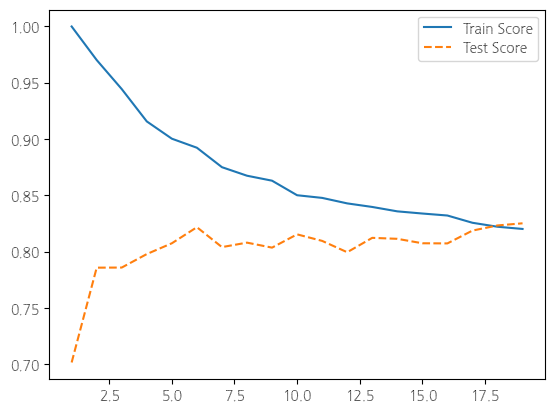

In [125]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

MinSamplesLeaf = 6

테스트 점수가 0.822로 가장 높습니다. 이는 과적합을 피하면서도 좋은 성능을 보이는 설정입니다.

In [141]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [142]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.892,0.822
1,6,0.892,0.822
2,8,0.892,0.822
3,10,0.892,0.822
4,12,0.892,0.822
5,14,0.889,0.826
6,16,0.887,0.821
7,18,0.884,0.816
8,20,0.880,0.818
9,22,0.877,0.816


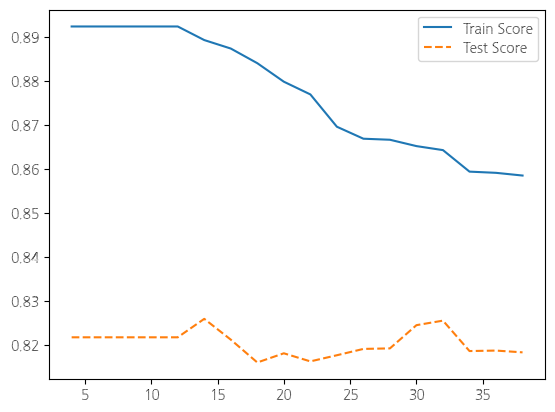

In [143]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

MinSamplesSplit = 14

 테스트 데이터에서 성능이 가장 높았으며, 과적합을 방지하면서도 적절한 설명력을 유지하는 최적의 설정이라고 판단했기 때문입니다. 이 설정은 모델이 더 많은 샘플을 포함하여 분할을 결정하도록 하여, 일반화 성능을 개선하는 데 도움을 줍니다.

In [144]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=14
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [145]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.473,0.521
1,2,0.597,0.622
2,3,0.702,0.739
3,4,0.760,0.763
4,5,0.804,0.795
5,6,0.841,0.807
6,7,0.861,0.808
7,8,0.871,0.818
8,9,0.878,0.823
9,10,0.883,0.825


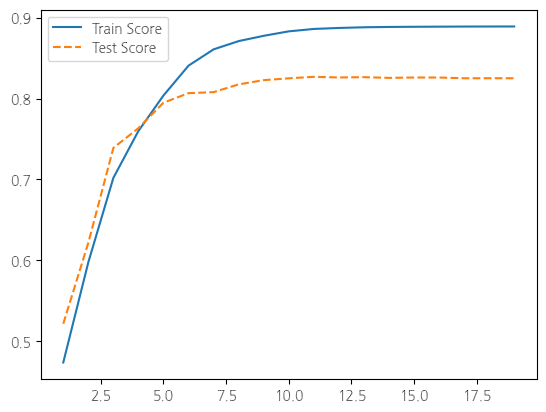

In [146]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [176]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 14, max_depth = 10, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.883
Score on test set: 0.825


In [177]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 1865.87869565  6955.29930508  4466.4322      9347.29318471
  6955.29930508  8518.37954545 15431.1584375   6829.88428571
  8453.02713855 32544.74142857]


In [178]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.700
0,Year,0.185
2,Mileage,0.020
5,Seats,0.017
1,Kilometers_Driven,0.016
12,Location_Hyderabad,0.012
3,Engine,0.011
46,Brand_MERCEDES-BENZ,0.007
24,Owner_Type_First,0.006
29,Brand_AUDI,0.006


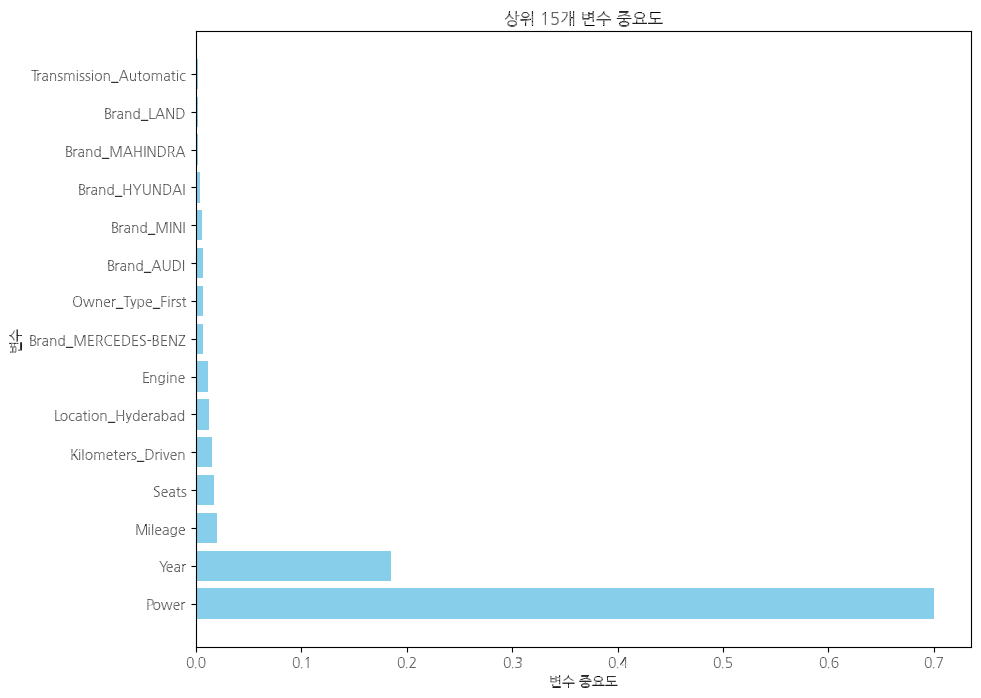

In [156]:
# 중요도를 기준으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)

# 상위 15개 변수 선택
top_15_importance = df_importance.head(15)

# 그래프 그리기
plt.figure(figsize=(10, 8))
coordinates = range(len(top_15_importance))
plt.barh(y=coordinates, width=top_15_importance["Importance"], color='skyblue')
plt.yticks(coordinates, top_15_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("상위 15개 변수 중요도")
plt.show()